In [ ]:
import os
import cv2
import keras
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
categories = os.listdir('/content/drive/MyDrive/food20dataset/test_set')

img_size = 256
def get_data(data_dir):
    data = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img)) #[...,::-1] #convert BGR to RGB format #optional
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) #reshape
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

train = get_data('/content/drive/MyDrive/food20dataset/train_set')
val = get_data('/content/drive/MyDrive/food20dataset/test_set')

x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

<ipython-input-3-f3ba3bad8753>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
model = Sequential()
model.add(Conv2D(128,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(20, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      36896     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 64)        0

In [ ]:
opt = Adam(lr=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])
history = model.fit(x_train,y_train,epochs = 20, validation_data = (x_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


45/45 [==============================] - 627s 14s/step - loss: 3.0010 - accuracy: 0.0507 - val_loss: 2.9799 - val_accuracy: 0.0493
Epoch 2/20
45/45 [==============================] - 604s 13s/step - loss: 2.9377 - accuracy: 0.0874 - val_loss: 2.8458 - val_accuracy: 0.1773
Epoch 3/20
45/45 [==============================] - 611s 14s/step - loss: 2.7413 - accuracy: 0.1550 - val_loss: 2.5700 - val_accuracy: 0.1970
Epoch 4/20
45/45 [==============================] - 607s 14s/step - loss: 2.4855 - accuracy: 0.2424 - val_loss: 2.3706 - val_accuracy: 0.2578
Epoch 5/20
45/45 [==============================] - 610s 14s/step - loss: 2.2451 - accuracy: 0.3291 - val_loss: 2.2173 - val_accuracy: 0.3136
Epoch 6/20
45/45 [==============================] - 610s 14s/step - loss: 1.9902 - accuracy: 0.3961 - val_loss: 2.1138 - val_accuracy: 0.3415
Epoch 7/20
45/45 [==============================] - 610s 14s/step - loss: 1.7449 - accuracy: 0.4644 - val_loss: 1.9969 - val_accuracy: 0.3760
Epoch 8/20
45/45 

In [ ]:
>
.
.
.
.
>
Ignore the code below but you will find graphs and stuff below

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Food_Classification/cnn_model.hdf5')

In [ ]:
import h5py

file_path = '/content/drive/MyDrive/Food_Classification/cnn_model.hdf5'

# Load the HDF5 file
with h5py.File(file_path, 'r') as h5_file:
    # Get the list of dataset names using the keys() method
    dataset_names = list(h5_file.keys())

    # Print the dataset names
    print("Dataset names:", dataset_names)


Dataset names: ['model_weights', 'optimizer_weights']


In [ ]:
file_path = '/content/drive/MyDrive/Food_Classification/cnn_model.hdf5'

# Function to recursively print the contents of an HDF5 group
def print_hdf5_group(group, indent=''):
    for key in group.keys():
        if isinstance(group[key], h5py.Group):
            print(f"{indent}Group: {key}")
            print_hdf5_group(group[key], indent + '  ')
        elif isinstance(group[key], h5py.Dataset):
            print(f"{indent}Dataset: {key}")

# Open the HDF5 file
with h5py.File(file_path, 'r') as h5_file:
    # Print the contents of the HDF5 file
    print_hdf5_group(h5_file)


Group: model_weights
  Group: conv2d_4
    Group: conv2d_4
      Dataset: bias:0
      Dataset: kernel:0
  Group: conv2d_5
    Group: conv2d_5
      Dataset: bias:0
      Dataset: kernel:0
  Group: conv2d_6
    Group: conv2d_6
      Dataset: bias:0
      Dataset: kernel:0
  Group: conv2d_7
    Group: conv2d_7
      Dataset: bias:0
      Dataset: kernel:0
  Group: dense_2
    Group: dense_2
      Dataset: bias:0
      Dataset: kernel:0
  Group: dense_3
    Group: dense_3
      Dataset: bias:0
      Dataset: kernel:0
  Group: dropout_1
  Group: flatten_1
  Group: max_pooling2d_4
  Group: max_pooling2d_5
  Group: max_pooling2d_6
  Group: max_pooling2d_7
  Group: top_level_model_weights
Group: optimizer_weights
  Group: Adam
    Group: conv2d_4
      Group: bias
        Dataset: m:0
        Dataset: v:0
      Group: kernel
        Dataset: m:0
        Dataset: v:0
    Group: conv2d_5
      Group: bias
        Dataset: m:0
        Dataset: v:0
      Group: kernel
        Dataset: m:0
      

In [ ]:
epochs = list(range(1, 21))
accuracy = [0.0655, 0.1367, 0.2354, 0.3171, 0.3953, 0.4644, 0.5285, 0.5962, 0.6350, 0.6772,
            0.7421, 0.7893, 0.8485, 0.8929, 0.8837, 0.9190, 0.9387, 0.9521, 0.9605, 0.9676]
loss = [2.9913, 2.8191, 2.5104, 2.2708, 2.0047, 1.8007, 1.5696, 1.3747, 1.2063, 1.0704,
        0.8437, 0.7076, 0.5330, 0.4245, 0.4087, 0.3107, 0.2243, 0.1918, 0.1562, 0.1398]
val_accuracy = [0.1478, 0.2184, 0.2594, 0.3645, 0.3415, 0.4154, 0.4433, 0.4598, 0.4828, 0.5025,
                0.5222, 0.5287, 0.5238, 0.5337, 0.4959, 0.5484, 0.5599, 0.5402, 0.5501, 0.5681]
val_loss = [2.9403, 2.6248, 2.4010, 2.1136, 2.0385, 1.9223, 1.8614, 1.8769, 1.8679, 1.8046,
            1.7646, 1.7196, 1.9107, 1.8910, 2.1572, 1.9694, 2.1417, 2.2688, 2.2476, 2.3006]

save_path = '/content/drive/MyDrive/Food_Classification/epoch_data.hdf5'

# Save the epoch data to HDF5 format
with h5py.File(save_path, 'w') as h5_file:
    h5_file.create_dataset('epochs', data=np.array(epochs))
    h5_file.create_dataset('accuracy', data=np.array(accuracy))
    h5_file.create_dataset('loss', data=np.array(loss))
    h5_file.create_dataset('val_accuracy', data=np.array(val_accuracy))
    h5_file.create_dataset('val_loss', data=np.array(val_loss))

print("Epoch data saved to HDF5 file:", save_path)


Epoch data saved to HDF5 file: /content/drive/MyDrive/Food_Classification/epoch_data.hdf5


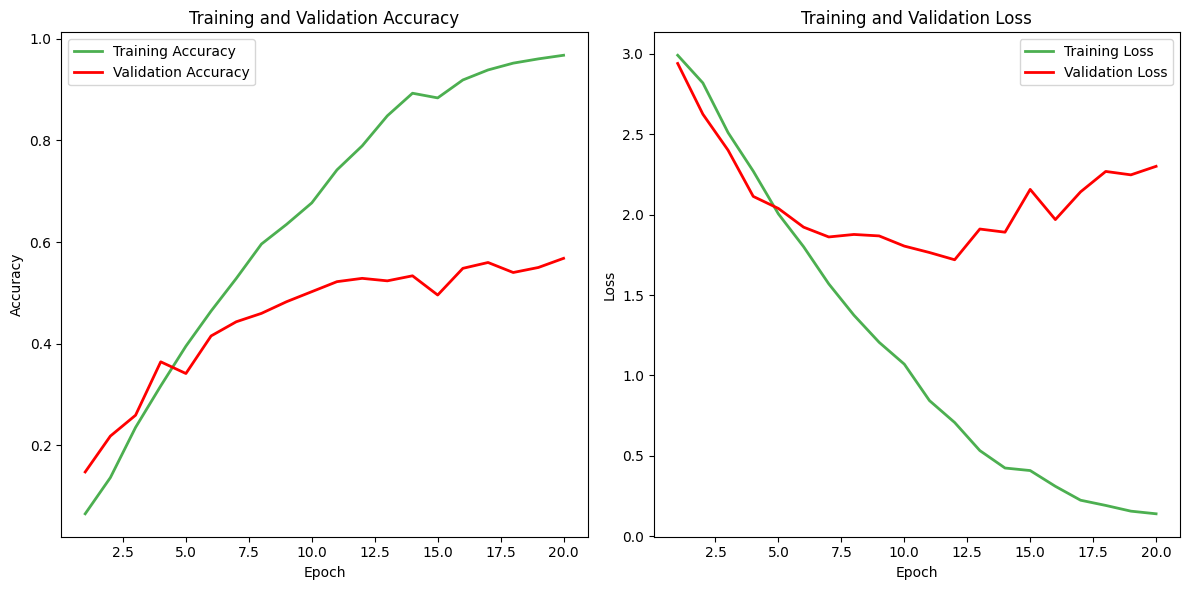

In [ ]:
import h5py
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/Food_Classification/epoch_data.hdf5'

# Load the HDF5 file
with h5py.File(file_path, 'r') as h5_file:
    # Access the datasets
    epochs = h5_file['epochs'][:]
    accuracy = h5_file['accuracy'][:]
    loss = h5_file['loss'][:]
    val_accuracy = h5_file['val_accuracy'][:]
    val_loss = h5_file['val_loss'][:]

# Plotting
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy', c='#4CAF50', linewidth=2)
plt.plot(epochs, val_accuracy, label='Validation Accuracy', c='red', linewidth=2)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss', c='#4CAF50', linewidth=2)
plt.plot(epochs, val_loss, label='Validation Loss', c='red', linewidth=2)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
predictions = model.predict(x_val)
predicted_classes = np.argmax(predictions, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val, predicted_classes, target_names=categories))


20/20 [==============================] - 116s 2s/step
                  precision    recall  f1-score   support

    bisibelebath       0.62      0.33      0.43        30
          samosa       1.00      0.60      0.75        30
          dhokla       0.81      0.97      0.88        30
           chaat       0.60      0.70      0.65        30
        vada pav       0.97      0.93      0.95        30
       paniyaram       0.90      0.93      0.92        30
           poori       1.00      0.83      0.91        30
            idly       0.83      0.77      0.80        39
       meduvadai       0.87      0.87      0.87        30
      ven pongal       0.50      0.90      0.64        30
           halwa       0.50      0.73      0.59        30
        chappati       0.80      0.80      0.80        30
            upma       0.52      0.37      0.43        30
         noodles       0.90      0.90      0.90        30
        biriyani       0.85      0.73      0.79        30
      kathi roll 

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.applications.inception_v3 import preprocess_input
from IPython.display import display, Image
from ipywidgets import FileUpload
# Load the model
model = load_model('/content/drive/MyDrive/Food_Classification/cnn_model.hdf5')

# Define categories
categories = os.listdir('/content/drive/MyDrive/food20dataset/test_set')

img_size = 256

# Preprocess and predict on the uploaded image
def predict_image_class(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    return categories[predicted_class]

# Load and preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (img_size, img_size))
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)
    return img

# Create an interactive file uploader widget
uploader = FileUpload(accept='.jpg', multiple=False)

# Display the uploader widget
display(uploader)

# Function to handle image upload and prediction
def handle_upload(change):
    uploaded_filename = next(iter(uploader.value))
    image_data = uploader.value[uploaded_filename]['content']
    image_path = '/content/' + uploaded_filename

    # Save the uploaded image
    with open(image_path, 'wb') as f:
        f.write(image_data)

    # Display the uploaded image
    display(Image(filename=image_path, width=300, height=300))

    # Make a prediction
    predicted_class = predict_image_class(image_path)
    print("Predicted class:", predicted_class)

# Attach the event handler to the uploader
uploader.observe(handle_upload, names='value')


OSError: ignored